In [ ]:
import yelpapi
import json
import requests
from  pprint import  pprint
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

counties=pd.read_csv("acs2015_county_data.csv")
counties["county_string"] = counties["County"] + " County, " + counties["State"]
listofcounties = counties["county_string"].tolist()
zipcodes=pd.read_csv("zip_codes_states.csv")
zipcodes["county_string"] = zipcodes["county"] + " County, " + zipcodes["state"]
listofzipcodes=zipcodes["county_string"].unique().tolist()
counties.to_csv("counties.csv")
zipcodes.to_csv("zcs.csv")
counties.head()

In [2]:
#comparing to other similar sized counties in the Southeast
#Charlotte, Raleigh, Atlanta, Memphis, Orlando
#comparing to other similar sized counties in other parts of the US
#Milwaukee, San Francisco, Austin, Pittsburgh

countieslist = ["Mecklenburg County, North Carolina",
                "Wake County, North Carolina", "Fulton County, Georgia", "Shelby County, Tennessee", "Orange County, Florida",
                "Milwaukee County, Wisconsin", "San Francisco County, California", "Travis County, Texas", "Allegheny County, Pennsylvania"]
countiescompare = counties[counties["county_string"].isin(countieslist)]
countiescompare
sample_list = countiescompare["county_string"].tolist()
sample_list

['San Francisco County, California',
 'Orange County, Florida',
 'Fulton County, Georgia',
 'Mecklenburg County, North Carolina',
 'Wake County, North Carolina',
 'Allegheny County, Pennsylvania',
 'Shelby County, Tennessee',
 'Travis County, Texas',
 'Milwaukee County, Wisconsin']

In [7]:
res_df = pd.DataFrame(columns=["name","zipcode","county_string","rating","review_count","category","price"])
res_df

,name,zipcode,county_string,rating,review_count,category,price


In [31]:
r = 0
for c in sample_list:
    county_string = str(c)
    for term in ["Italian","Mexican","Chinese","American (Traditional)","American (New)","Indian"]:
        #we are allowed 5000 queries per 24 hours. if we run out, we can create another. till then, use this
        yelpkey="IXRN_1GI8f8J9Kj5O5GciqeyFSWR5RMh41_rADGy1KrtQ5ZABGGZEkWwot5mOka0NlzlNxXPmzYXLWk88oOV0N_YxD1MSW4kQRfJnFrwfHLtKrr2HcsjLo6uWBzAWnYx"
        try:
            offset=0
            for loopcount in range(5):
                
                response = requests.get(url="https://api.yelp.com/v3/businesses/search", 
                       params= {"location": county_string,"term": term, "limit":"50", "offset": offset}, 
                       headers={'Authorization': 'bearer %s' % yelpkey})
                responsejson = response.json()
                offset += 50
                try:
                    count=0
            
                    for x in range(0,49):
                        for y in range(0,len(responsejson["businesses"][x]["categories"])):
                            if ((responsejson["businesses"][x]["categories"][y]["title"]==term) and 
                                (responsejson["businesses"][x]["review_count"] > 0)):
                        
                                zc = int(responsejson["businesses"][x]["location"]["zip_code"])
                                if (zipcodes.loc[zipcodes["zip_code"]==zc]["county_string"].tolist()[0]== county_string):
                            
#                                     print("\n",responsejson["businesses"][x]["name"],
#                                           responsejson["businesses"][x]["location"]["zip_code"],
#                                           zipcodes.loc[zipcodes["zip_code"]==zc]["county_string"].tolist()[0],
#                                           responsejson["businesses"][x]["rating"],
#                                           responsejson["businesses"][x]["review_count"],
#                                           responsejson["businesses"][x]["categories"][y]["title"])
                            
                                    res_df.loc[r]=[responsejson["businesses"][x]["name"],
                                          str(zc),
                                          county_string,
                                          responsejson["businesses"][x]["rating"],
                                          responsejson["businesses"][x]["review_count"],
                                          term,
                                          responsejson["businesses"][x]["price"]]
                                    count += 1
                                    r += 1
                except:
                    break
    
                print("End of list. Found", count, term, "restaurants in", county_string)
        except:
            break


End of list. Found 48 Italian restaurants in San Francisco County, California
End of list. Found 46 Italian restaurants in San Francisco County, California
End of list. Found 49 Mexican restaurants in San Francisco County, California
End of list. Found 39 Chinese restaurants in San Francisco County, California
End of list. Found 35 Chinese restaurants in San Francisco County, California
End of list. Found 36 Chinese restaurants in San Francisco County, California
End of list. Found 48 American (New) restaurants in San Francisco County, California
End of list. Found 49 Indian restaurants in San Francisco County, California
End of list. Found 34 Mexican restaurants in Orange County, Florida
End of list. Found 31 Mexican restaurants in Orange County, Florida
End of list. Found 32 Chinese restaurants in Orange County, Florida
End of list. Found 26 Chinese restaurants in Orange County, Florida
End of list. Found 21 Chinese restaurants in Orange County, Florida
End of list. Found 27 Italian 

In [32]:

res_df.to_csv("output1804042050.csv")
res_df.price.replace(["$","$$","$$$","$$$$"],[1,2,3,4],inplace=True)
res_df




res_df["rating"].value_counts()

4.0    833
3.5    436
4.5    367
3.0     99
5.0     21
2.5     13
Name: rating, dtype: int64

In [43]:
itadf = res_df.groupby(res_df["category"]).get_group("Italian")
mexdf = res_df.groupby(res_df["category"]).get_group("Mexican")
chndf = res_df.groupby(res_df["category"]).get_group("Chinese")
ustdf = res_df.groupby(res_df["category"]).get_group("American (Traditional)")
usndf = res_df.groupby(res_df["category"]).get_group("American (New)")
inddf = res_df.groupby(res_df["category"]).get_group("Indian")

CHA = res_df.groupby(res_df["county_string"]).get_group("Mecklenburg County, North Carolina")
CHAbreakdown = pd.DataFrame(CHA["category"].value_counts()).T.reset_index()
CHAbreakdown["county_string"]="Mecklenburg County, North Carolina"
CHA_price_avg = CHA.groupby(res_df["price"]).mean()
CHA_price_count = CHA["price"].value_counts()

RAL = res_df.groupby(res_df["county_string"]).get_group("Wake County, North Carolina")
RALbreakdown = pd.DataFrame(RAL["category"].value_counts()).T.reset_index()
RALbreakdown["county_string"]="Wake County, North Carolina"
RAL_price_avg = RAL.groupby(res_df["price"]).mean()
RAL_price_count = RAL["price"].value_counts()

ATL = res_df.groupby(res_df["county_string"]).get_group("Fulton County, Georgia")
ATLbreakdown = pd.DataFrame(ATL["category"].value_counts()).T.reset_index()
ATLbreakdown["county_string"]="Fulton County, Georgia"
ATL_price_avg = ATL.groupby(res_df["price"]).mean()
ATL_price_count = ATL["price"].value_counts()

MEM = res_df.groupby(res_df["county_string"]).get_group("Shelby County, Tennessee")
MEMbreakdown = pd.DataFrame(MEM["category"].value_counts()).T.reset_index()
MEMbreakdown["county_string"]="Shelby County, Tennessee"
MEM_price_avg = MEM.groupby(res_df["price"]).mean()
MEM_price_count = MEM["price"].value_counts()


ORL = res_df.groupby(res_df["county_string"]).get_group("Orange County, Florida")
ORLbreakdown = pd.DataFrame(ORL["category"].value_counts()).T.reset_index()
ORLbreakdown["county_string"]="Orange County, Florida"
ORL_price_avg = ORL.groupby(res_df["price"]).mean()
ORL_price_count = ORL["price"].value_counts()

MIL = res_df.groupby(res_df["county_string"]).get_group("Milwaukee County, Wisconsin")
MILbreakdown = pd.DataFrame(MIL["category"].value_counts()).T.reset_index()
MILbreakdown["county_string"]="Milwaukee County, Wisconsin"
MIL_price_avg = MIL.groupby(res_df["price"]).mean()
MIL_price_count = MIL["price"].value_counts()

SFC = res_df.groupby(res_df["county_string"]).get_group("San Francisco County, California")
SFCbreakdown = pd.DataFrame(SFC["category"].value_counts()).T.reset_index()
SFCbreakdown["county_string"]="San Francisco County, California"
SFC_price_avg = SFC.groupby(res_df["price"]).mean()
SFC_price_count = SFC["price"].value_counts()

AUS = res_df.groupby(res_df["county_string"]).get_group("Travis County, Texas")
AUSbreakdown = pd.DataFrame(AUS["category"].value_counts()).T.reset_index()
AUSbreakdown["county_string"]="Travis County, Texas"
AUS_price_avg = AUS.groupby(res_df["price"]).mean()
AUS_price_count = AUS["price"].value_counts()

PIT = res_df.groupby(res_df["county_string"]).get_group("Allegheny County, Pennsylvania")
PITbreakdown = pd.DataFrame(PIT["category"].value_counts()).T.reset_index()
PITbreakdown["county_string"]="Allegheny County, Pennsylvania"
PIT_price_avg = PIT.groupby(res_df["price"]).mean()
PIT_price_count = PIT["price"].value_counts()


In [60]:
TOTAL_price_avg = res_df.groupby(res_df["price"]).mean()
TOTAL_county_reviews = res_df.groupby(res_df["county_string"]).sum()["review_count"].reset_index()
TOTAL_county_reviews.columns=["county_string","total reviews"]
TOTAL_county_avg = res_df.groupby(res_df["county_string"]).mean().reset_index()

county_stats = TOTAL_county_avg.merge(TOTAL_county_reviews, on="county_string")
county_df = county_stats.merge(counties, on="county_string")
county_df

,county_string,rating,review_count,price,total reviews,CensusId,State,County,TotalPop,Men,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,"Allegheny County, Pennsylvania",4.051402,146.803738,2.046729,15708,42003,Pennsylvania,Allegheny,1231145,592511,...,4.2,1.5,4.2,26.4,612259,86.2,9.3,4.5,0.1,7.1
1,"Fulton County, Georgia",3.856000,195.300000,1.824000,48825,13121,Georgia,Fulton,983903,478161,...,2.8,1.4,7.9,27.4,471816,83.1,11.5,5.2,0.1,9.9
2,"Mecklenburg County, North Carolina",3.977477,144.459459,1.693694,16035,37119,North Carolina,Mecklenburg,990288,476765,...,1.9,1.3,6.1,25.3,502455,86.0,9.1,4.8,0.1,8.9
3,"Milwaukee County, Wisconsin",3.860976,92.195122,1.819512,18900,55079,Wisconsin,Milwaukee,955939,461804,...,3.9,1.5,3.0,22.5,445174,84.8,11.7,3.4,0.1,9.3
4,"Orange County, Florida",3.911765,150.108597,1.547511,33174,12095,Florida,Orange,1229039,603946,...,1.1,2.1,4.6,26.7,603683,86.5,9.1,4.3,0.1,9.1
5,"San Francisco County, California",3.920635,638.809524,1.882086,281715,6075,California,San Francisco,840763,427909,...,10.4,6.5,6.9,31.7,478373,79.9,11.3,8.7,0.1,6.8
6,"Shelby County, Tennessee",3.904762,78.928571,1.773810,6630,47157,Tennessee,Shelby,937750,447161,...,1.3,1.5,2.8,22.6,425295,80.9,13.9,5.1,0.1,10.3
7,"Travis County, Texas",3.948276,272.020690,1.751724,39443,48453,Texas,Travis,1121645,564941,...,2.1,2.7,7.4,24.8,599597,76.5,16.0,7.4,0.2,6.0
8,"Wake County, North Carolina",3.997561,118.336585,1.756098,24259,37183,North Carolina,Wake,976019,474967,...,1.4,1.3,7.4,24.1,499197,80.1,15.1,4.8,0.1,6.4


,county_string,rating,review_count,price,total reviews
0,"Allegheny County, Pennsylvania",4.051402,146.803738,2.046729,15708
1,"Fulton County, Georgia",3.856000,195.300000,1.824000,48825
2,"Mecklenburg County, North Carolina",3.977477,144.459459,1.693694,16035
3,"Milwaukee County, Wisconsin",3.860976,92.195122,1.819512,18900
4,"Orange County, Florida",3.911765,150.108597,1.547511,33174
5,"San Francisco County, California",3.920635,638.809524,1.882086,281715
6,"Shelby County, Tennessee",3.904762,78.928571,1.773810,6630
7,"Travis County, Texas",3.948276,272.020690,1.751724,39443
8,"Wake County, North Carolina",3.997561,118.336585,1.756098,24259


In [34]:
comp_df = pd.DataFrame(columns=["Italian","Mexican","Chinese","American (Traditional)","American (New)", "Indian","county_string"])
comp_df = comp_df.append(CHAbreakdown)
comp_df = comp_df.append(RALbreakdown)
comp_df = comp_df.append(ATLbreakdown)
comp_df = comp_df.append(MEMbreakdown)
comp_df = comp_df.append(ORLbreakdown)
comp_df = comp_df.append(MILbreakdown)
comp_df = comp_df.append(SFCbreakdown)
comp_df = comp_df.append(AUSbreakdown)
comp_df = comp_df.append(PITbreakdown)
comp_df = comp_df.reset_index()
del comp_df["index"]
del comp_df["level_0"]
#comp_df["Totals"]=comp_df["Italian"]+comp_df["Mexican"]+comp_df["Chinese"]+comp_df["Indian"]+comp_df["American (Traditional)"]+comp_df["American (New)"]
comp_df

,American (New),American (Traditional),Chinese,Indian,Italian,Mexican,county_string
0,22,1,14,16,3,55,"Mecklenburg County, North Carolina"
1,36,10,37,28,21,73,"Wake County, North Carolina"
2,11,13,38,36,65,87,"Fulton County, Georgia"
3,1,NaN,33,5,38,7,"Shelby County, Tennessee"
4,NaN,25,79,24,24,69,"Orange County, Florida"
5,44,11,52,17,63,18,"Milwaukee County, Wisconsin"
6,54,4,138,81,115,49,"San Francisco County, California"
7,5,9,49,39,42,1,"Travis County, Texas"
8,19,9,4,23,45,7,"Allegheny County, Pennsylvania"


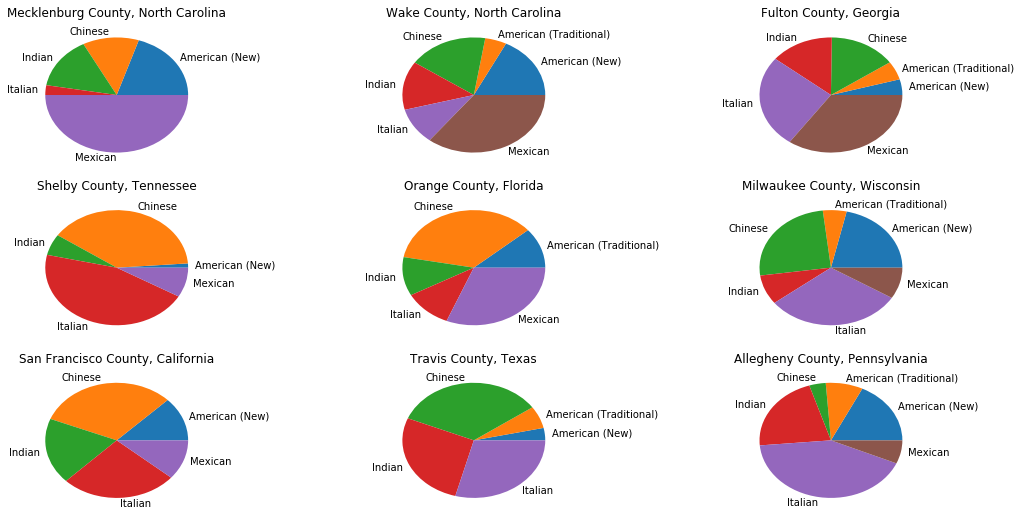

In [35]:
fig, axes = plt.subplots(3,3,figsize= (16,9))
for i, (idx, row) in enumerate(comp_df.set_index("county_string").iterrows()):
    ax = axes[i // 3, i % 3]
    row = row[row.gt(row.sum()*.01)]
    ax.pie(row, labels=row.index)
    ax.set_title(idx)
fig.subplots_adjust(wspace=1)

In [ ]:
comp = pd.DataFrame(res_df["category"].groupby(res_df["county_string"]).value_counts())
comp
#I HAVE NO IDEA WHAT TO DO WITH THIS

In [ ]:
CHA = CHA["category"].value_counts().reset_index()
CHA["county_string"]="Mecklenburg County, North Carolina"
CHA.columns = ["category","count","county_string"]
CHA